# Load data from the allen and plot reference structures

The first cell takes a while. It needs to download data for the allen common reference framework and it takes a while to actually isolate the contours for each reference.

The references are in milimeters and in reference to a reference point, for example the approximate location of bregma. 

The following scripts are to compute new references. There are shipped by default:

|dorsal_cortex|vis_som |
|-------------|--------|
|MOB          | RSPv   |
|FRP          | RSPd   |
|MOp          | SSs    |
|MOs          | SSp-bfd|
|SSp-n        | SSp-tr |
|SSp-m        | SS-ll  |
|SSp-un       | SS-ul  |
|PL           | TEa    | 
|ACAd         | VISpor |
|RSPv         | VISli  |
|RSPd         | VISp   |
|RSPagl       | VISpm  |
|VISC         | VISl   |
|SSs          | VISal  |
|SSp-bfd      | VISrl  |
|SSp-tr       | VISa   |
|SSp-ll       | VISam  |
|SSp-ul       |        |
|TEa          |        |
|AUDd         |        |
|AUDp         |        |
|AUDpo        |        |
|AUDv         |        |
|VISli        |        |
|VISpor       |        |
|VISpl        |        |
|VISpm        |        |
|VISl         |        |
|VISal        |        |
|VISrl        |        |
|VISa         |        |
|VISam        |        |
|VISp         |        |

In [272]:
from wfieldtools.allen_utils import *

reference_name = 'dorsal_cortex'
selection = selection_dorsal_cortex
resolution = 10

# Get reference data by querying the allen Common Coordinate Framework
# # this takes a while
mask_volume, areas = allen_volume_from_structures(structures = selection,
                                                  resolution=10, 
                                                  version = 'annotation/ccf_2017')
# Save volume (not used)
# np.save(pjoin(annotation_dir,'{0}_volume.npy'.format(reference_name)),mask_volume)
# Flatten the volume to get a top view projection 
# (reference to a bregma estimate location of )
proj, ccf_regions = allen_flatten_areas(areas,mask_volume,resolution = resolution, reference= [540,570])
# get the projection outline (for masking and so)
brainoutline = projection_outline(proj, resolution,reference = [540,570])

# Save all this 
allen_save_reference(ccf_regions,proj,brainoutline,reference_name)

No projection for GU
No projection for ACAv


In [280]:
from wfieldtools import *
# Load references
ccf_regions,proj,brain_outline = allen_load_reference('dorsal_cortex')

ccf_regions.head()

,acronym,name,reference,resolution,label,id,allen_rgb,left_x,left_y,right_x,right_y
0,MOB,Main olfactory bulb,"[540, 570]",10,1,507,"[154, 210, 189]","[-0.06, -0.065, -0.065, -0.07, -0.075, -0.075,...","[-3.265, -3.27, -3.2800000000000002, -3.285, -...","[0.06, 0.065, 0.065, 0.07, 0.075, 0.075, 0.08,...","[-3.265, -3.27, -3.2800000000000002, -3.285, -..."
1,FRP,"Frontal pole, cerebral cortex","[540, 570]",10,2,184,"[38, 143, 69]","[-0.6900000000000001, -0.7000000000000001, -0....","[-3.455, -3.455, -3.455, -3.455, -3.455, -3.45...","[0.6900000000000001, 0.7000000000000001, 0.71,...","[-3.455, -3.455, -3.455, -3.455, -3.455, -3.45..."
2,MOp,Primary motor area,"[540, 570]",10,3,985,"[31, 157, 90]","[-0.74, -0.75, -0.76, -0.77, -0.78, -0.79, -0....","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6...","[0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81...","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6..."
3,MOs,Secondary motor area,"[540, 570]",10,4,993,"[31, 157, 90]","[-0.22, -0.23, -0.24, -0.25, -0.26, -0.27, -0....","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6...","[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.2...","[0.665, 0.665, 0.665, 0.665, 0.665, 0.665, 0.6..."
4,SSp-n,"Primary somatosensory area, nose","[540, 570]",10,5,353,"[24, 128, 100]","[-4.47, -4.48, -4.485, -4.485, -4.485, -4.485,...","[0.725, 0.725, 0.72, 0.71, 0.7000000000000001,...","[4.47, 4.48, 4.485, 4.485, 4.485, 4.485, 4.485...","[0.725, 0.725, 0.72, 0.71, 0.7000000000000001,..."


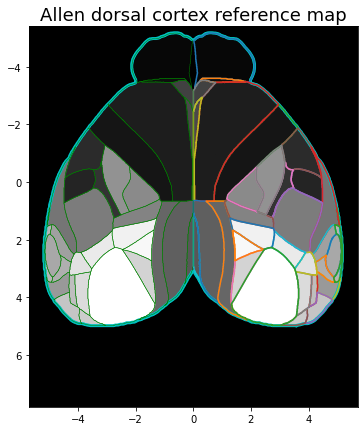

In [284]:
# Plot the reference areas
%matplotlib inline
plt.figure(figsize=[7,7])
plt.imshow(proj,extent = allen_proj_extent(proj,ccf_regions),origin='top',cmap = 'gray')
plt.plot(brainc[:,0],brainc[:,1],'c',lw=3)

for c in ccf_regions.iterrows():
    c = c[1]
    plt.plot(c.right_x,c.right_y)
    plt.plot(c.left_x,c.left_y,'g',lw=.5)
    
plt.axis(allen_proj_extent(proj,ccf_regions, foraxis=True))
plt.title('Allen dorsal cortex reference map',fontsize=18);